# Mini project 1 - Basic Data Analytics with Pandas

In the first week, we’ll practice data exploration and data analysis in Python with a real-world dataset – Sberbank data, which is available in the [Sberbank Russian Housing Market Kaggle competition](https://www.kaggle.com/c/sberbank-russian-housing-market). Sberbank dataset contains rich and messy data about Russian's housing market. This real-world data will provide you concrete practices for getting started with python. 

This step-by-step mini project will cover the most essential and useful techniques for data analysis in solving a real-world problem with key Python data analysis libraries: pandas and numpy. We’ll go through data loading and data frame creation, selection and query, grouping and function applying, plotting and writing data to file. 

In [70]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Question 1: Read the train set and test set of Sberbank dataset from the train.csv and test.csv, and call them train_data and test_data. **

Hint: You can read data from a CSV file using the read_csv function in pandas. By default, it assumes that the fields are comma-separated.

In [3]:
train_data = pd.read_csv('all/train.csv')
test_data = pd.read_csv('all/test.csv')

** Question 2: Merge train and test to one dataframe and call it full_data. **

Hint: The new dataframe should have the rows from train_data followed by rows from test_data. Refer to [merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html). 

In [4]:
print(train_data.shape[0])
print(test_data.shape[0])

30471
7662


In [5]:
train_data.shape

(30471, 292)

In [6]:
test_data.shape

(7662, 291)

In [7]:
test = pd.concat([train_data, test_data], axis=1)
test.shape

(30471, 583)

In [72]:
full_data = pd.concat([train_data,test_data])

In [73]:
print(str(full_data.shape[0]) + ' = {} + {}'.format(train_data.shape[0] , test_data.shape[0]))

38133 = 30471 + 7662


***For the rest questions, if not specified, we'll do practice on train_data. Let's create a dataframe called df from train_data.***

In [24]:
df = train_data

** Question 3: Preview the first 10 rows with head().**

Hint: You can change the number of rows displayed by specifying a number. There is a similar function tail(), which will show you the last columns of a dataframe.

In [77]:
df.head(3)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,ts_year,ts_dayofweek,room_size
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,13,22,1,0,52,4,5850000,2011,5,NaN
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,29,1,10,66,14,6000000,2011,1,NaN
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,11,27,0,4,67,10,5700000,2011,5,NaN


**Question 4: How many columns and rows are there in the data?**

In [12]:
df.shape

(30471, 292)

**Question 5: Which features are available in the data? Display the features.**

Hint: The features are the column names. You can print them out.

In [79]:
df.columns.values

array(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'sub_area', 'area_m', 'raion_popul',
       'green_zone_part', 'indust_part', 'children_preschool',
       'preschool_quota', 'preschool_education_centers_raion',
       'children_school', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion',
       'nuclear_reactor_raion', 'detention_facility_raion', 'full_all',
       'male_f', 'female_f', 'young_all', 'young_male',

**Question 6: What's the data type of each column? Save the datatype as data_type.**

In [14]:
# df.dtypes.groupby(by=df.dtypes.values).size()

In [15]:
df.dtypes

id                                         int64
timestamp                                 object
full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school     

In [16]:
for i in range(len(df.dtypes)):
    print (df.dtypes.index[i], df.dtypes[i])

id int64
timestamp object
full_sq int64
life_sq float64
floor float64
max_floor float64
material float64
build_year float64
num_room float64
kitch_sq float64
state float64
product_type object
sub_area object
area_m float64
raion_popul int64
green_zone_part float64
indust_part float64
children_preschool int64
preschool_quota float64
preschool_education_centers_raion int64
children_school int64
school_quota float64
school_education_centers_raion int64
school_education_centers_top_20_raion int64
hospital_beds_raion float64
healthcare_centers_raion int64
university_top_20_raion int64
sport_objects_raion int64
additional_education_raion int64
culture_objects_top_25 object
culture_objects_top_25_raion int64
shopping_centers_raion int64
office_raion int64
thermal_power_plant_raion object
incineration_raion object
oil_chemistry_raion object
radiation_raion object
railroad_terminal_raion object
big_market_raion object
nuclear_reactor_raion object
detention_facility_raion object
full_all int64
m

**Question 7: Which variables are numerical variables (excluding 'id')? Put all the numerical variable in list.**

Hint: Use the index of the data_type we just created in Q5. The data type of numerical variables should be int or float. Remenber to remove the 'id'.

In [81]:
num_vars = list(df.dtypes[df.dtypes=='int64'].index) + list(df.dtypes[df.dtypes=='float64'].index)
# num_vars

In [82]:
num_vars.remove('id')

**Question 8: Select the first 5 rows with 'id' (the 1st column) and 'price_doc' (the last column) columns from the data. **

Hint: You can find out several ways to solve this question. 

In [83]:
df[:3]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,ts_year,ts_dayofweek,room_size
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,13,22,1,0,52,4,5850000,2011,5,NaN
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,29,1,10,66,14,6000000,2011,1,NaN
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,11,27,0,4,67,10,5700000,2011,5,NaN


In [35]:
df.loc[:3]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,ts_year,ts_dayofweek
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0,13,22,1,0,52,4,5850000,2011,5
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,0,15,29,1,10,66,14,6000000,2011,1
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0,11,27,0,4,67,10,5700000,2011,5
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,1,4,4,0,0,26,3,13100000,2011,3


In [36]:
df[:5][['id','price_doc']]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


In [37]:
df[['id','price_doc']][:5]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


In [84]:
df.iloc[:5,[0,-1]]

,id,room_size
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN


In [85]:
df.loc[:5,['id','price_doc']]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452
5,6,9100000


**Question 9: Select the rows with the full area larger than 10 and smaller than 1500. Full area is indicated by 'full_sq'.**

Hint: You can use boolean indexing or query. Try both methods.

In [40]:
df[(df.full_sq>10) & (df.full_sq<1500)]

# http://pandas.pydata.org/pandas-docs/version/0.15.2/indexing.html#boolean-indexing


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,ts_year,ts_dayofweek
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0,13,22,1,0,52,4,5850000,2011,5
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,0,15,29,1,10,66,14,6000000,2011,1
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0,11,27,0,4,67,10,5700000,2011,5
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,1,4,4,0,0,26,3,13100000,2011,3
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,17,135,236,2,91,195,14,16331452,2011,0
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,1,53,78,1,20,113,17,9100000,2011,1
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,3,38,80,1,27,127,8,5500000,2011,3
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,0,11,18,1,0,47,4,2000000,2011,4
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,1,18,34,1,3,85,11,5300000,2011,5
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0,10,20,1,3,67,1,2000000,2011,1


In [41]:
df.query('full_sq>10 and full_sq<1500')

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,ts_year,ts_dayofweek
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0,13,22,1,0,52,4,5850000,2011,5
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,0,15,29,1,10,66,14,6000000,2011,1
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0,11,27,0,4,67,10,5700000,2011,5
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,1,4,4,0,0,26,3,13100000,2011,3
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,17,135,236,2,91,195,14,16331452,2011,0
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,1,53,78,1,20,113,17,9100000,2011,1
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,3,38,80,1,27,127,8,5500000,2011,3
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,0,11,18,1,0,47,4,2000000,2011,4
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,1,18,34,1,3,85,11,5300000,2011,5
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0,10,20,1,3,67,1,2000000,2011,1


**Question 10: Find the index of the rows with full area ('full_sq') smaller than living area ('life_sq'). Change the 'life_sq' in these rows to NAN.**

In [42]:
sq_index = df.query('full_sq<life_sq').index

In [43]:
type(sq_index)

pandas.core.indexes.numeric.Int64Index

In [44]:
df.loc[sq_index,'life_sq'] = np.NaN

** Question 11: Check how many rows in life_sq are NAN? **

In [86]:
df.life_sq.isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
30441    False
30442    False
30443     True
30444     True
30445    False
30446    False
30447     True
30448     True
30449    False
30450     True
30451     True
30452    False
30453    False
30454    False
30455    False
30456    False
30457    False
30458    False
30459     True
30460    False
30461    False
30462    False
30463    False
30464    False
30465     True
30466    False
30467    False
30468     True
30469    False
30470    False
Name: life_sq, Length: 30471, dtype: bool

In [89]:
df.life_sq.isnull().value_counts()

False    24051
True      6420
Name: life_sq, dtype: int64

**Question 12: The 'product_type' column tells us whether this housing is a owner-occupier purchase or investment. Which type is more common? What's the percentage of each type?**

In [47]:
df.product_type.value_counts()

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

In [48]:
df.product_type.value_counts(normalize=True)

Investment       0.638246
OwnerOccupier    0.361754
Name: product_type, dtype: float64

**Question 13: Group the data by 'product_type' and calculate the median price for each type. The price is indicated by 'price_doc' column.**

Hint: First select the two columns, then group and aggregate. If you choose .aggragate() method, use np.median for the median calculation.

In [49]:
df.pivot_table(index='product_type', values='price_doc', aggfunc=np.mean)

,price_doc
product_type,
Investment,7.495294e+06
OwnerOccupier,6.466255e+06


In [50]:
df[['product_type','price_doc']].groupby('product_type').median()

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


In [51]:
df[['product_type','price_doc']].groupby('product_type').aggregate(np.median)

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


** Question 14: Check how many houses are there in each product type and each state. First group by product_type and then group by state. Name this as grouped**

In [52]:
grouped = df.groupby(['product_type','state']).size()

In [91]:
grouped

product_type   state
Investment     1.0       520
               2.0      5802
               3.0      5653
               4.0       413
               33.0        1
OwnerOccupier  1.0      4335
               2.0        42
               3.0       137
               4.0         9
dtype: int64

**Question 15: Unstack the state index in grouped.**

Hint: Use unstack() to turn the index values in state into column names.

In [54]:
grouped.unstack('state')

state,1.0,2.0,3.0,4.0,33.0
product_type,,,,,
Investment,520.0,5802.0,5653.0,413.0,1.0
OwnerOccupier,4335.0,42.0,137.0,9.0,NaN


**Question 16: Add a new feature called 'room_size', which indicated the average living area in each room of a housing. 'num_room' is the column that shows the number of rooms.**


In [55]:
df['room_size']=df['life_sq']/df['num_room']

In [56]:
df[['life_sq','num_room']].apply(lambda x:x[0]/x[1],axis=1)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
           ...    
30441     0.250000
30442    40.000000
30443          NaN
30444          NaN
30445    47.000000
30446    41.000000
30447          NaN
30448          NaN
30449    47.000000
30450          NaN
30451          NaN
30452    19.000000
30453     1.000000
30454    13.000000
30455    26.333333
30456    15.000000
30457    14.333333
30458     1.000000
30459          NaN
30460    16.000000
30461    19.000000
30462    30.

**Quesion 17: Change the format of timestamp to '%Y-%m-%d'. **

Hint: For more info about timestamp in pandas, read [this document](https://pandas.pydata.org/pandas-docs/stable/timeseries.html). 

In [98]:
df['timestamp'] = pd.to_datetime(df.timestamp)
df['ts_year'] = df['timestamp'].dt.year 
df['ts_dayofweek'] = df['timestamp'].dt.weekday_name

df18 = df.loc[0:5,['timestamp','ts_year','ts_dayofweek']]
df18

,timestamp,ts_year,ts_dayofweek
0,2011-08-20,2011,Saturday
1,2011-08-23,2011,Tuesday
2,2011-08-27,2011,Saturday
3,2011-09-01,2011,Thursday
4,2011-09-05,2011,Monday
5,2011-09-06,2011,Tuesday


In [104]:
df['timestamp'][0]

Timestamp('2011-08-20 00:00:00')

In [107]:
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d')

**Question 18: Add new features called 'ts_year' and 'ts_dayofweek', which indicate the year and the number of the day of the week.**

Hint: you can use apply() to apply functions to the data.

In [108]:
df['ts_year']=df['timestamp'].apply(lambda x:x.year)

In [109]:
df['ts_dayofweek']=df['timestamp'].apply(lambda x:x.dayofweek)

In [110]:
df['ts_dayofweek']

0        5
1        1
2        5
3        3
4        0
5        1
6        3
7        4
8        5
9        1
10       4
11       4
12       5
13       0
14       0
15       1
16       1
17       1
18       3
19       3
20       3
21       3
22       4
23       4
24       4
25       5
26       0
27       0
28       0
29       1
        ..
30441    5
30442    5
30443    5
30444    5
30445    5
30446    5
30447    5
30448    5
30449    5
30450    0
30451    0
30452    0
30453    0
30454    0
30455    0
30456    0
30457    0
30458    0
30459    0
30460    0
30461    1
30462    1
30463    1
30464    1
30465    1
30466    1
30467    1
30468    1
30469    1
30470    1
Name: ts_dayofweek, Length: 30471, dtype: int64

**Question 19: Draw histogram of price to see the distribution.**

Hint: You can use matplotlib or pandas for this histogram. 

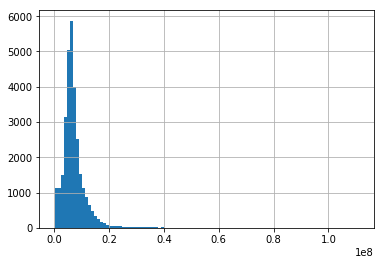

In [114]:
df.price_doc.hist(bins=100)

**Question 20: From the plot in Q15, most of the data have smaller values and the right tail of the distribution is very long. Apply a logorithm transformation to price and add this as a new feature called 'log_price'.**

In [116]:
df['price_doc'].values

array([ 5850000,  6000000,  5700000, ...,  6970959, 13500000,  5600000])

In [65]:
# log
df['log_price']=np.log(df['price_doc'].values)

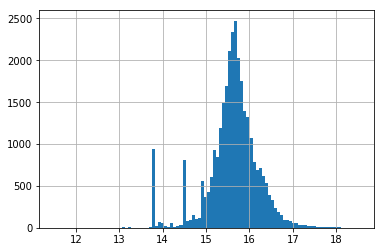

In [66]:
plt.figure()
plt.hist(df['log_price'],bins=100)
plt.grid()
plt.show()

** Question 21: Drop the log_price column.**

In [67]:
df.drop('log_price',axis=1,inplace=True)

**Question 22: Save the dataframe we have now to train_new.csv file**

In [117]:
df.to_csv('train_new.csv')

**Now you've finished basic data processing for Sberbank dataset.**

In [68]:
# df['life_sq'].iloc[:20] = np.nan

In [69]:
# df['life_sq']